In [7]:
#Installing dependencies
!pip install kaggle
!pip install torch
!pip install imageio

    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 235kB 5.6MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
    100% |████████████████████████████████| 519.5MB 31kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59e68000 @  0x7f6aac61a1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 3.3MB 8.5MB/s 
  Running setup.py bdist_wheel for imageio ...

In [0]:
#Import Dependencies
import os
import numpy as np
import pandas as pd
import torch
import imageio
import matplotlib.pyplot as plt
from torch.utils import data

In [9]:
#Upload the kaggle Credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nicksrkp","key":"ae75bab040bba9ac268662273820bc5e"}'}

In [10]:
#Check if the uploaded file is present
ls -1ha kaggle.json


kaggle.json


In [0]:
#File Configurations
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
#Download Dataset
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 63.0MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 57.6MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 99.5MB/s]
 92% 151M/163M [00:01<00:00, 123MB/s]
100% 163M/163M [00:01<00:00, 94.9MB/s]
 87% 33.0M/37.9M [00:00<00:00, 66.5MB/s]
100% 37.9M/37.9M [00:00<00:00, 75.9MB/s]


In [13]:
#Unzip
!ls
!unzip train.zip

depths.csv   sample_data	    test.zip   train.zip
kaggle.json  sample_submission.csv  train.csv
Archive:  train.zip
   creating: images/
   creating: masks/
  inflating: images/8d08955cdf.png   
  inflating: images/e045664b46.png   
  inflating: images/4989c6509e.png   
  inflating: images/fff4eb4941.png   
  inflating: images/3a310860a3.png   
  inflating: images/7a696bb878.png   
  inflating: images/8d3ee9356b.png   
  inflating: images/213e0a9f7b.png   
  inflating: images/78f17697f2.png   
  inflating: images/bd20d18369.png   
  inflating: images/de08c5a3b7.png   
  inflating: images/f06ef6c8b7.png   
  inflating: images/b2d02516e1.png   
  inflating: images/5edb37f5a8.png   
  inflating: images/b1f0e104f5.png   
  inflating: images/40e8e14e60.png   
  inflating: images/6e1444d88d.png   
  inflating: images/f342603c76.png   
  inflating: images/7ba58ee1be.png   
  inflating: images/14a89a1840.png   
  inflating: images/4319885cf1.png   
  inflating: images/bb697642ae.png   
  infla

In [0]:
#Class to represent dataset
class TGSSaltDataset(data.Dataset):
  def __init__(self,root_path,file_list):
    self.root_path=root_path
    self.file_list=file_list
  def __len__(self):
    return len(self.file_list)
  def __getitem__(self,index):
    file_id=self.file_list[index]
    #image folder + path
    image_folder=os.path.join(self.root_path,'images')
    image_path=os.path.join(image_folder,file_id+'.png')
    #label folder +path
    mask_folder=os.path.join(self.root_path,'masks')
    mask_path=os.path.join(mask_folder,file_id+'.png')
    #read it
    image=np.array(imageio.imread(image_path),dtype=np.uint8)
    mask=np.array(imageio.imread(mask_path),dtype=np.uint8)
    
    return image,mask
  

In [0]:
#Init our new class dataset
train_mask = pd.read_csv('train.csv')
depth = pd.read_csv('depths.csv')
train_path = './'
file_list = list(train_mask['id'].values)
dataset=TGSSaltDataset(train_path,file_list)

In [0]:
#Visualization of Images
def plot2x2array(image,mask):
  #invoke matplotlib!
  f,axarr=plt.subplots(1,2)
  axarr[0].imshow(image)
  axarr[1].imshow(mask)
  axarr[0].grid()
  axarr[1].grid()
  axarr[0].set_title('Image')
  axarr[1].set_title('Mask')
  

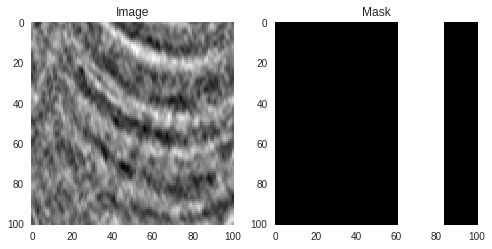

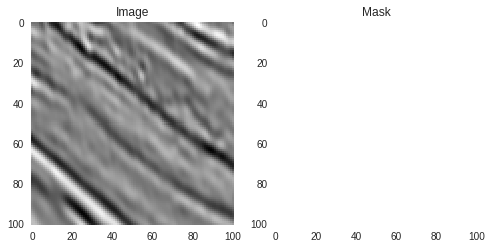

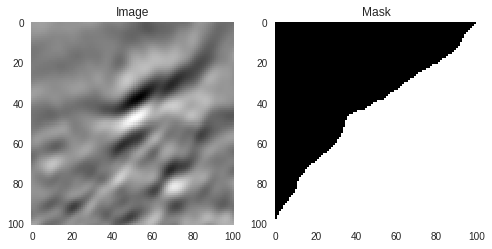

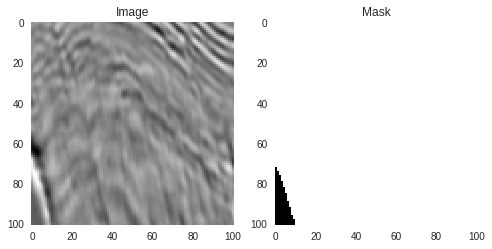

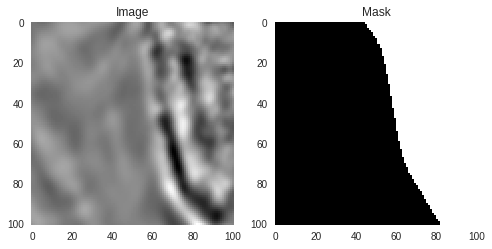

In [17]:
#Print Images
for i in range(5):
  image, mask = dataset[np.random.randint(0,len(dataset))]
  plot2x2array(image,mask)

Text(0.5,1,'depth distribution')

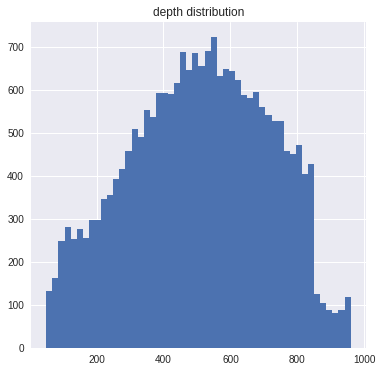

In [18]:
#Plot distribution of depths
plt.figure(figsize= (6,6))
plt.hist(depth['z'],bins=50)
plt.title('depth distribution')

In [0]:
#Convert run length encoding to iamegs that can be input into our model
def rleToMask(relString,height,width):
  #Width,Height
  rows,cols = height,width
  try:
    rleNumbers = [int(numbstring) for numstring in rleString.split(' ')]
    rlePairs = np.array(rleNUmbers).reshape(-1,2)
    img = np.zeros(rows*cols,dtype=uint8)
    for index,length in rlePairs:
      index-=1
      img[index:index+length]=255
    img = img.reshape(cols,rows)
    img=img.T
  except:
    img=np.zeros((cols,rows))
  return img

In [0]:
#Function for measuring how salty an image is
def salt_proportion(imgArray):
  try:
    unique,counts =np.unique(imgArray,return_counts=True)
    return counts[1]/10201
  except:
    return 0.0

In [0]:
#Prepare to merge Depth
train_mask['mask']=train_mask['rle_mask'].apply(lambda x:rleToMask(x,101,101))
train_mask['salt_proportion']=train_mask['mask'].apply(lambda x: salt_proportion(x))


In [22]:
#Merge
merged = train_mask.merge(depth,how='left')
merged.head()

,id,rle_mask,mask,salt_proportion,z
0,575d24d81d,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,843
1,a266a2a9df,5051 5151,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,794
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,468
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,727
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,797


Text(0.5,1,'Proportion of salt vs depth')

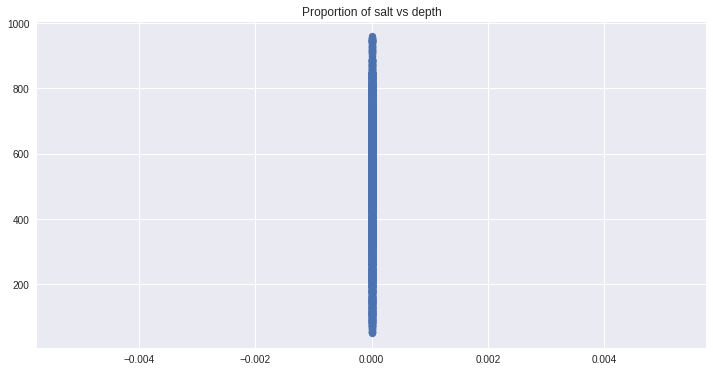

In [23]:
#Show proportion of salt vs depth
plt.figure(figsize=(12,6))
plt.scatter(merged['salt_proportion'],merged['z'])
plt.title('Proportion of salt vs depth')

In [0]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K

In [0]:
im_width = 128
im_height = 128
border = 5
im_chan = 2 # Number of channels: first is original and second cumsum(axis=0)
n_features = 1 # Number of extra features, like depth

In [26]:
# Build U-Net model
input_img = Input((im_height, im_width, im_chan), name='img')
input_features = Input((n_features, ), name='feat')

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (input_img)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

# Join features information in the depthest layer
f_repeat = RepeatVector(8*8)(input_features)
f_conv = Reshape((8, 8, n_features))(f_repeat)
p4_feat = concatenate([p4, f_conv], -1)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4_feat)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
#check out this skip connection thooooo
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[input_img, input_features], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy') #, metrics=[mean_iou]) # The mean_iou metrics seens to leak train and test values...
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 2)  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 8)  152         img[0][0]                        
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 128, 128, 8)  584         conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 64, 64, 8)    0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 

In [27]:
!pip install ipywidgets

In [28]:
import sys
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize


train_ids = next(os.walk(train_path+"images"))[2]


# Get and resize train images and masks
X = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.float32)
y = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)
X_feat = np.zeros((len(train_ids), n_features), dtype=np.float32)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = train_path
    
    # Depth
    #X_feat[n] = depth.loc[id_.replace('.png', ''), 'z']
    
    # Load X
    img = load_img(path + '/images/' + id_, grayscale=True)
    x_img = img_to_array(img)
    x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
    
    # Create cumsum x
    x_center_mean = x_img[border:-border, border:-border].mean()
    x_csum = (np.float32(x_img)-x_center_mean).cumsum(axis=0)
    x_csum -= x_csum[border:-border, border:-border].mean()
    x_csum /= max(1e-3, x_csum[border:-border, border:-border].std())

    # Load Y
    mask = img_to_array(load_img(path + '/masks/' + id_, grayscale=True))
    mask = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

    # Save images
    X[n, ..., 0] = x_img.squeeze() / 255
    X[n, ..., 1] = x_csum.squeeze()
    y[n] = mask / 255

print('Done!')


Getting and resizing train images and masks ... 


100%|██████████| 4000/4000 [00:24<00:00, 161.10it/s]

Done!


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, X_feat_train, X_feat_valid, y_train, y_valid = train_test_split(X, X_feat, y, test_size=0.15, random_state=42)

In [30]:
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

results = model.fit({'img': X_train, 'feat': X_feat_train}, y_train, batch_size=16, epochs=50, callbacks=callbacks,
                    validation_data=({'img': X_valid, 'feat': X_feat_valid}, y_valid))

Train on 3400 samples, validate on 600 samples
Epoch 1/50
3400/3400 [==============================] - 23s 7ms/step - loss: 0.5719 - val_loss: 0.5148

Epoch 00001: val_loss improved from inf to 0.51483, saving model to model-tgs-salt-1.h5
Epoch 2/50
3400/3400 [==============================] - 17s 5ms/step - loss: 0.4548 - val_loss: 0.3924

Epoch 00002: val_loss improved from 0.51483 to 0.39241, saving model to model-tgs-salt-1.h5
Epoch 3/50
3400/3400 [==============================] - 17s 5ms/step - loss: 0.3555 - val_loss: 0.3237

Epoch 00003: val_loss improved from 0.39241 to 0.32367, saving model to model-tgs-salt-1.h5
Epoch 4/50
3400/3400 [==============================] - 17s 5ms/step - loss: 0.3041 - val_loss: 0.2971

Epoch 00004: val_loss improved from 0.32367 to 0.29712, saving model to model-tgs-salt-1.h5
Epoch 5/50
3400/3400 [==============================] - 17s 5ms/step - loss: 0.2720 - val_loss: 0.2496

Epoch 00005: val_loss improved from 0.29712 to 0.24962, saving model 